In [237]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [238]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [240]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [241]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

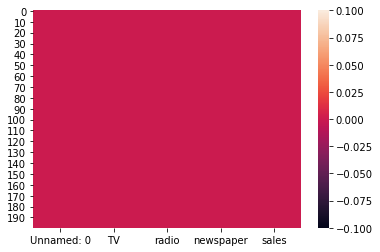

In [242]:
sns.heatmap(df.isnull())

In [243]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

<AxesSubplot:>

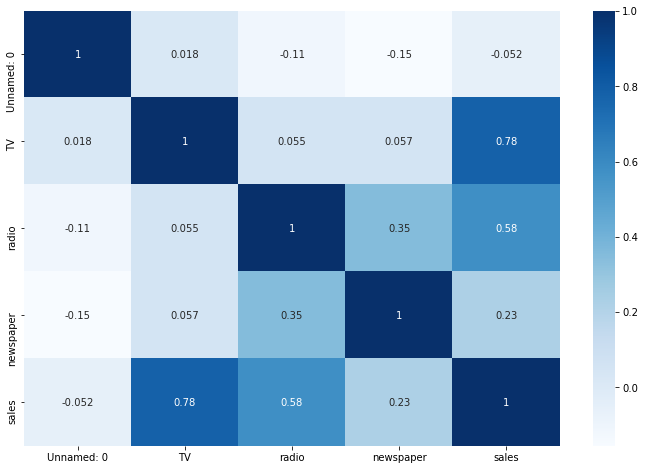

In [244]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Unnamed: 0       AxesSubplot(0.125,0.536818;0.110714x0.343182)
TV            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
radio         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
newspaper     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sales         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

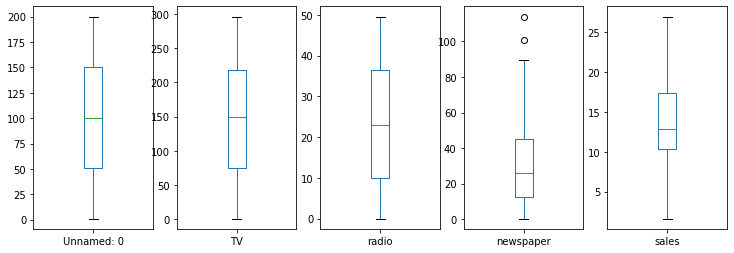

In [245]:
df.plot(kind='box',layout=(2,6),subplots=True,figsize=(15,9))

<AxesSubplot:xlabel='TV', ylabel='Density'>

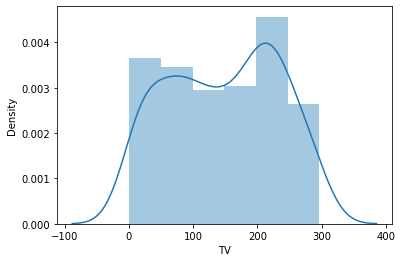

In [246]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

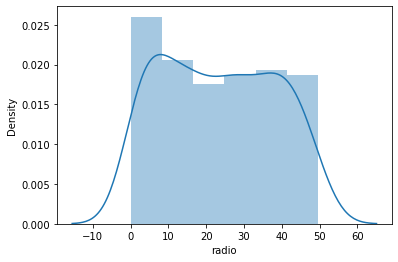

In [247]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

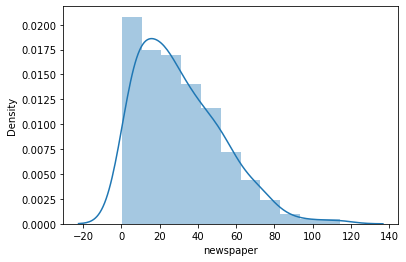

In [248]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

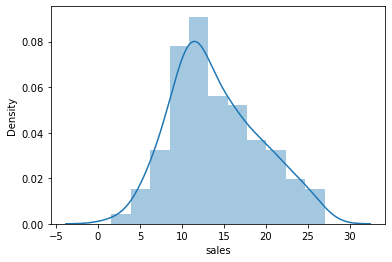

In [249]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='sales'>

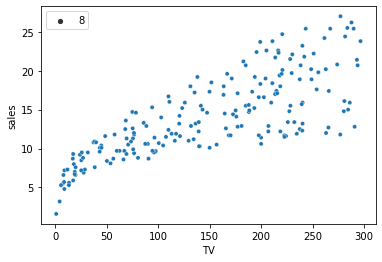

In [250]:
sns.scatterplot(x='TV',y='sales',data=df,size=8)

<AxesSubplot:xlabel='TV', ylabel='newspaper'>

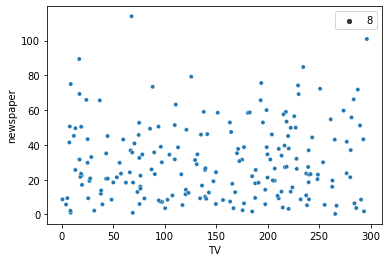

In [251]:
sns.scatterplot(x='TV',y='newspaper',data=df,size=8)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

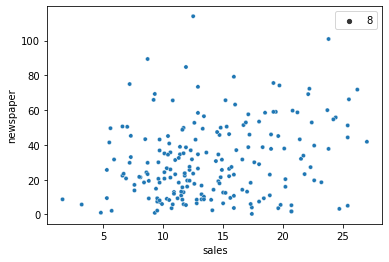

In [252]:
sns.scatterplot(x='sales',y='newspaper',data=df,size=8)

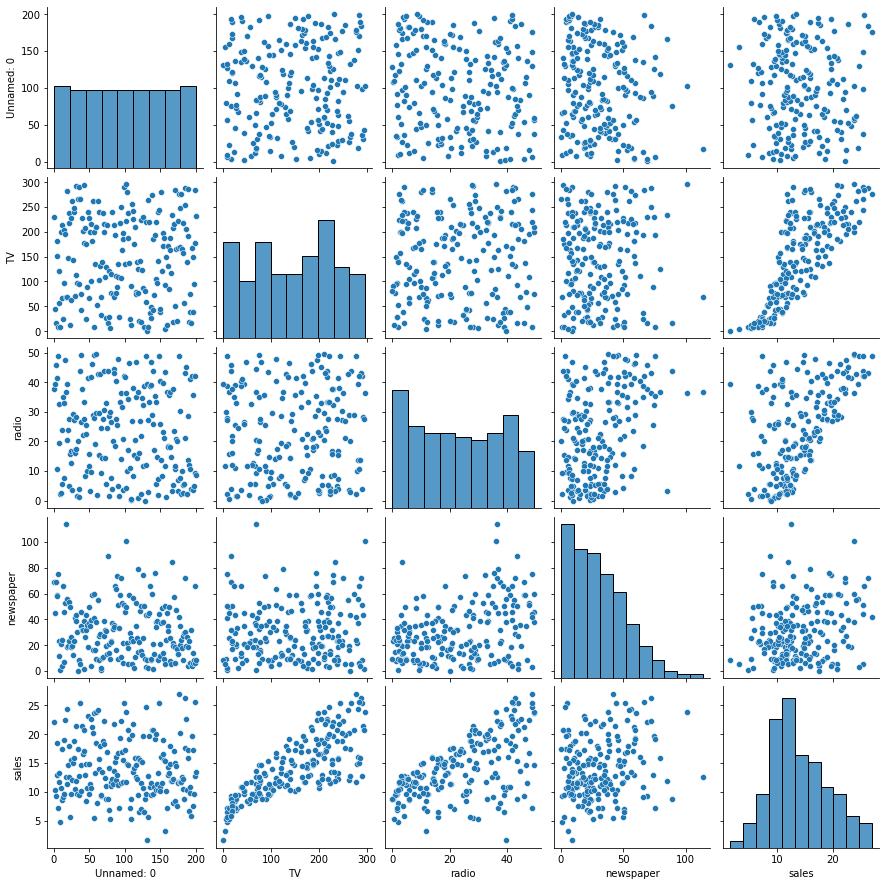

In [253]:
sns.pairplot(df)

In [254]:
import numpy as np

In [255]:
from scipy.stats import zscore

In [256]:
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [257]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [258]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 5)
(198, 5)


In [259]:
df.shape

(200, 5)

In [260]:
df_new.shape

(198, 5)

In [261]:
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [262]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

In [263]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [264]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [265]:
x=df.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [266]:
y=df.iloc[:,-1]

In [267]:
MaxAccu=0
MaxRS=0

for i in range (1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=r2_score(y_test,predlr_test)
    if acc>MaxAccu:
        MaxAccu=acc
        MaxRS=i
print("Best Accuracy is ", MaxAccu, "on Random State ", MaxRS)

Best Accuracy is  0.9408653671240439 on Random State  358


In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=358)

In [269]:
x_train.shape

(150, 3)

In [270]:
y_train.shape

(150,)

In [271]:
x_test.shape

(50, 3)

In [272]:
y_test.shape

(50,)

In [273]:
lr=LinearRegression()

In [274]:
lr.fit(x_train,y_train)

LinearRegression()

In [275]:
lr_pred=lr.predict(x_test)
lr_pred

array([ 5.3001432 , 19.74926587, 18.23957812, 20.14015368, 12.30092679,
        9.97261107, 12.66002947, 23.84797322, 20.04931606, 10.10302254,
       11.89264936,  9.42015636, 19.40748645, 14.16397464, 24.46357137,
       18.20681715,  8.37880632,  7.55727056,  8.74234073, 14.23611752,
       20.51860729, 14.09102541, 20.83633277,  9.94934496, 16.28949067,
       20.63422274, 19.0516144 , 12.16554756, 16.23643427, 18.46010485,
       22.99992771,  7.36773158, 12.48010195,  4.5120279 , 14.90078812,
       11.33402163, 12.78607977,  6.04306894, 20.99490106, 14.82109592,
       19.69861286, 21.44309122,  8.82227606, 19.19628293, 15.40853272,
        4.53736649, 23.09226174,  4.50088434, 17.39297467,  8.72068396])

In [276]:
lr.score(x_train,y_train)

0.8712276687132149

In [277]:
print(r2_score(y_test,lr_pred))

0.9408653671240439


In [278]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

1.1866182025884549
2.139463578982439
1.4626905274125621


In [279]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion="mse",max_depth=5,min_samples_split=5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=5)

In [280]:
dt.score(x_train,y_train)

0.9790735904315143

In [281]:
dt_pred=dtc.predict(x_test)
dt_pred

array([ 5.38      , 20.3       , 18.28      , 20.3       , 15.        ,
       12.29166667, 15.        , 24.98      , 20.3       , 11.775     ,
       12.29166667, 11.775     , 18.28      , 12.29166667, 24.98      ,
       18.62      , 11.775     ,  6.93333333,  9.3375    , 15.        ,
       22.9625    , 15.        , 22.9625    , 12.29166667, 18.28      ,
       20.3       , 20.3       ,  8.63333333, 17.1       , 14.675     ,
       20.3       , 10.1       , 10.76666667,  8.25      , 15.63333333,
       11.775     , 11.775     ,  6.93333333, 20.3       , 17.1       ,
       18.28      , 22.9625    ,  6.93333333, 20.3       , 15.63333333,
        8.25      , 24.98      ,  6.93333333, 18.28      ,  5.38      ])

In [282]:
print(r2_score(y_test,dtc_pred))

0.9539672878428661


In [283]:
print(mean_absolute_error(y_test,dt_pred))
print(mean_squared_error(y_test,dt_pred))
print(np.sqrt(mean_squared_error(y_test,dt_pred)))

1.0316999999999996
1.665442166666665
1.2905201147857654


In [284]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [286]:
rf.score(x_train,y_train)

0.9962674042190011

In [287]:
rf_pred=rf.predict(x_test)
rf_pred

array([ 4.626, 19.81 , 18.698, 19.721, 13.524, 11.607, 13.887, 25.04 ,
       19.959, 11.274, 12.172, 11.101, 20.201, 12.213, 24.956, 18.927,
       10.213,  7.122, 10.551, 14.864, 22.593, 14.528, 22.857, 11.187,
       16.81 , 20.222, 19.842,  8.162, 16.522, 15.292, 22.29 ,  9.452,
       11.58 ,  7.735, 15.164, 11.765, 12.923,  6.883, 21.544, 16.05 ,
       20.225, 23.741,  8.136, 19.365, 15.941,  7.851, 24.589,  6.841,
       17.877,  5.346])

In [288]:
print(r2_score(y_test,rf_pred))
print(mean_absolute_error(y_test,rf_pred))
print(mean_squared_error(y_test,rf_pred))
print(np.sqrt(mean_squared_error(y_test,rf_pred)))

0.9858004298341473
0.5767399999999978
0.5137338599999947
0.716752300310222


In [289]:
from sklearn.svm import SVR
svr=SVR()

In [290]:
svr.fit(x_train,y_train)

SVR()

In [291]:
svr.score(x_train,y_train)

0.8144990399211682

In [292]:
pred=svr.predict(x_test)

In [293]:
svr_pred=rf.predict(x_test)
svr_pred

array([ 4.626, 19.81 , 18.698, 19.721, 13.524, 11.607, 13.887, 25.04 ,
       19.959, 11.274, 12.172, 11.101, 20.201, 12.213, 24.956, 18.927,
       10.213,  7.122, 10.551, 14.864, 22.593, 14.528, 22.857, 11.187,
       16.81 , 20.222, 19.842,  8.162, 16.522, 15.292, 22.29 ,  9.452,
       11.58 ,  7.735, 15.164, 11.765, 12.923,  6.883, 21.544, 16.05 ,
       20.225, 23.741,  8.136, 19.365, 15.941,  7.851, 24.589,  6.841,
       17.877,  5.346])

In [294]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

8.237644201577282
1.9944140024122958
0.7723120550363807


In [295]:
from sklearn.model_selection import cross_val_score

In [296]:
scr1=cross_val_score(lr,x,y,cv=5)
scr1

array([0.87865198, 0.91763212, 0.92933032, 0.81443904, 0.89547829])

In [297]:
scr2=cross_val_score(dt, x, y, cv=5)
scr2

array([0.9416063 , 0.957713  , 0.8744948 , 0.92099686, 0.96219941])

In [298]:
scr3=cross_val_score(rf, x, y, cv=5)
scr3

array([0.98012264, 0.98175959, 0.9702496 , 0.96247923, 0.98042297])

In [299]:
scr4=cross_val_score(svr, x, y, cv=5)
scr4

array([0.85588638, 0.87708809, 0.83259196, 0.84945885, 0.78718231])

In [300]:
print("Accuracy score of Linear regression model is: ", r2_score(y_test,lr_pred)*100)
print("cross val score of Linear regression model is: ",  scr1.mean()*100)

Accuracy score of Linear regression model is:  94.0865367124044
cross val score of Linear regression model is:  88.71063495438435


In [301]:
print("Accuracy score of Decision Tree regressor model is: ", r2_score(y_test,dt_pred)*100)
print("cross val score of Decision Tree regressor model is: ",  scr2.mean()*100)

Accuracy score of Decision Tree regressor model is:  95.39672878428661
cross val score of Decision Tree regressor model is:  93.14020725442737


In [302]:
print("Accuracy score of Random forest regressor model is: ", r2_score(y_test,rf_pred)*100)
print("cross val score of Random forest regressor model is: ",  scr3.mean()*100)

Accuracy score of Random forest regressor model is:  98.58004298341473
cross val score of Random forest regressor model is:  97.50068062997059


In [303]:
print("Accuracy score of Extra Trees regressor model is: ", r2_score(y_test,svr_pred)*100)
print("cross val score of Extra Trees regressor model is: ",  scr4.mean()*100)

Accuracy score of Extra Trees regressor model is:  98.58004298341473
cross val score of Extra Trees regressor model is:  84.04415171122854
